In [1]:
import distutils.spawn
from matplotlib import rc
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
if distutils.spawn.find_executable('latex'):
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)

In [3]:
n_x = 10**3
X = np.linspace(0, 1, n_x)

In [4]:
v_1 = 0.35
v_2 = 0.78
f_0 = 0.1
f_1 = 0.95
f_2 = 0.65

In [5]:
def target(x):
    if x <= v_1:
        return f_0
    elif x <= v_2:
        return f_1
    return f_2

In [6]:
def sigma(x):
    return (4*(x+0.5)**3) * (-0.5 < x <= 0) + (1 - 4*(0.5-x)**3) * (0 < x < 0.5) + 1 * (x > 0.5)

In [7]:
class NeuralNetwork:
    def __init__(self, a, u, eta):
        self.a = np.copy(a)
        self.u = np.copy(u)
        self.m = len(self.u)
        self.eta = eta
        self.sigma = lambda x: sigma(x / self.eta)
        #lambda x: np.minimum(np.maximum((x + self.eta/2) / self.eta, 0), 1)

    def __call__(self, x):
        """Evaluates the neural network at point x."""
        return a[0] + np.sum([self.a[i+1] * self.sigma(x - self.u[i]) for i in range(self.m)])

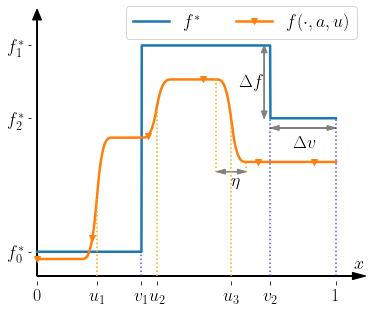

In [8]:
a = [0.07, 0.5, 0.24, -0.34]
u = [0.2, 0.4, 0.65]
eta = 0.1
nn = NeuralNetwork(a, u, eta)

plt.figure(figsize=(6, 5))
plt.box(on=False)
plt.xlim([-0.02, 1.1])
plt.ylim([-0.02, 1.1])
plt.arrow(0, 0, 1.1, 0, head_width=0.03, length_includes_head=True, color='black')
plt.annotate(r'$x$', (1.06, 0.03), size=18)
plt.arrow(0, 0, 0, 1.1, head_width=0.03, length_includes_head=True, color='black')

plt.plot(X, [target(x) for x in X], label=r'$f^*$', linewidth=2.5)
plt.plot(X, [nn(x) for x in X], marker='v', markevery=185, label=r'$f(\cdot, a,u)$', linewidth=2.5)
plt.legend(loc='center right', bbox_to_anchor=(1., 0.95), fontsize=18, ncol=2)

plt.vlines([v_1 - 1/n_x, v_2, 1], 0, [f_0, f_2, f_2], color='blue', linestyles='dotted', alpha=0.7)
plt.vlines(u, 0, [nn(x) for x in u], color='orange', linestyles='dotted')
plt.xticks([0, v_1 - 1/n_x, v_2, 1] + u, [0, r'$v_1$', r'$v_2$', 1] + [r'$u_{}$'.format(k+1) for k in range(len(u))], size=18)
#plt.hlines([f_0, f_1, f_2], 0, [0, v_1, v_2], color='blue', linestyles='dashed', alpha=0.5)
plt.yticks([f_0, f_1, f_2], [r'$f_0^*$', r'$f_1^*$', r'$f_2^*$'], size=18)

#plt.arrow(0.04, 0, 0, 1, head_width=0.03, length_includes_head=True, color='gray')
#plt.arrow(0.04, 1, 0, -1, head_width=0.03, length_includes_head=True, color='gray')
#plt.annotate(r'$M$', (0.05, 0.5), size=15)

plt.arrow(v_2, f_2-0.04, 1-v_2, 0, head_width=0.02, length_includes_head=True, color='gray')
plt.arrow(1, f_2-0.04, -(1-v_2), 0, head_width=0.02, length_includes_head=True, color='gray')
plt.annotate(r'$\Delta v$', ((1+v_2)/2-0.035, f_2 - 0.12), size=18)

plt.arrow(v_2-0.02, f_2, 0, f_1-f_2, head_width=0.02, length_includes_head=True, color='gray')
plt.arrow(v_2-0.02, f_1, 0, -(f_1-f_2), head_width=0.02, length_includes_head=True, color='gray')
plt.annotate(r'$\Delta f$', (v_2 - 0.105, (f_1+f_2)/2-0.02), size=18)

plt.arrow(u[2] - eta/2, sum(a)-0.04, eta, 0, head_width=0.02, length_includes_head=True, color='gray')
plt.arrow(u[2] + eta/2, sum(a)-0.04, -eta, 0, head_width=0.02, length_includes_head=True, color='gray')
plt.vlines(u[2] - eta/2, sum(a)-0.04, sum(a)-a[-1], color='orange', linestyles='dotted')
plt.vlines(u[2] + eta/2, sum(a)-0.04, sum(a), color='orange', linestyles='dotted')
plt.annotate(r'$\eta$', (u[2], sum(a)-0.1), size=18)

plt.savefig('figures/manual_plots/notations.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

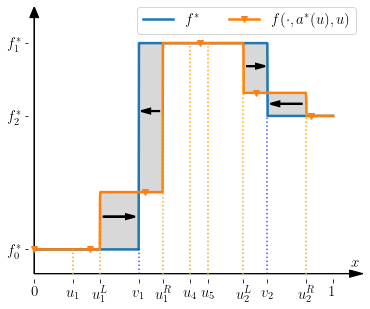

In [9]:
a = [0.1, 0., 0.236, 0.614, 0., 0., -0.205, -0.095]
u = [0.13, 0.22, 0.43, 0.52, 0.58, 0.7, 0.91]
eta = 0.001
nn = NeuralNetwork(a, u, eta)

plt.figure(figsize=(6, 5))
plt.box(on=False)
plt.xlim([-0.02, 1.1])
plt.ylim([-0.02, 1.1])
plt.arrow(0, 0, 1.1, 0, head_width=0.03, length_includes_head=True, color='black')
plt.annotate(r'$x$', (1.06, 0.03), size=15)
plt.arrow(0, 0, 0, 1.1, head_width=0.03, length_includes_head=True, color='black')

plt.plot(X, [target(x) for x in X], label=r'$f^*$', linewidth=2.5)
plt.plot(X, [nn(x) for x in X], marker='v', markevery=185, label=r'$f(\cdot, a^*(u), u)$', linewidth=2.5)
plt.fill_between(X, [target(x) for x in X], [nn(x) for x in X], color='gray', alpha=0.3)
plt.legend(loc='center right', bbox_to_anchor=(1., 0.95), fontsize=15, ncol=2)

plt.vlines([v_1 - 1/n_x, v_2], 0, [f_0, f_2], color='blue', linestyles='dotted', alpha=0.7)
plt.vlines(u, 0, [nn(x) for x in u], color='orange', linestyles='dotted')
plt.xticks([0, v_1 - 1/n_x, v_2, 1] + u, [0, r'$v_1$', r'$v_2$', 1] + [r'$u_1$', r'$u_1^L$', r'$u_1^R$', r'$u_4$', r'$u_5$', r'$u_2^L$', r'$u_2^R$'], size=15)
#plt.hlines([f_0, f_1, f_2], 0, [0, v_1, v_2], color='blue', linestyles='dashed', alpha=0.5)
plt.yticks([f_0, f_1, f_2], [r'$f_0^*$', r'$f_1^*$', r'$f_2^*$'], size=15)

plt.arrow(0.232, 0.235, 0.105, 0, head_width=0.02, linewidth=2, length_includes_head=True, color='black')
plt.arrow(0.418, 0.67, -0.06, 0, head_width=0.02, linewidth=2, length_includes_head=True, color='black')
plt.arrow(0.712, 0.855, 0.06, 0, head_width=0.02, linewidth=2, length_includes_head=True, color='black')
plt.arrow(0.895, 0.7, -0.105, 0, head_width=0.02, linewidth=2, length_includes_head=True, color='black')

plt.savefig('figures/manual_plots/sketch.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [10]:
v_1 = 0.5
f_0 = 0.2
f_1 = 0.9

In [11]:
def target(x):
    if x <= v_1:
        return f_0
    return f_1

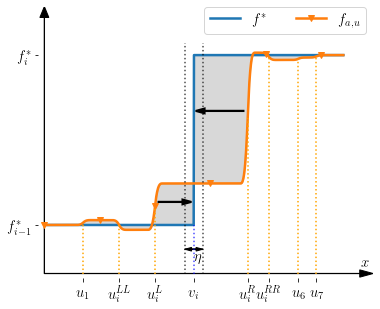

In [12]:
a = [0.2, 0.02, -0.04, 0.191, 0.539, -0.03, 0.01, 0.01, -0.02]
u = [0.13, 0.25, 0.37, 0.68, 0.75, 0.85, 0.91]
eta = 0.05
nn = NeuralNetwork(a, u, eta)

plt.figure(figsize=(6, 5))
plt.box(on=False)
plt.xlim([-0.02, 1.1])
plt.ylim([-0.02, 1.1])
plt.arrow(0, 0, 1.1, 0, head_width=0.03, length_includes_head=True, color='black')
plt.annotate(r'$x$', (1.06, 0.03), size=15)
plt.arrow(0, 0, 0, 1.1, head_width=0.03, length_includes_head=True, color='black')

plt.plot(X, [target(x) for x in X], label=r'$f^*$', linewidth=2.5)
plt.plot(X, [nn(x) for x in X], marker='v', markevery=185, label=r'$f_{a,u}$', linewidth=2.5)
plt.fill_between(X, [target(x) for x in X], [nn(x) for x in X], color='gray', alpha=0.3)
plt.legend(loc='center right', bbox_to_anchor=(1., 0.95), fontsize=15, ncol=2)

plt.vlines([v_1 - 1/n_x], 0, [f_0], color='blue', linestyles='dotted', alpha=0.7)
plt.vlines([v_1 - 0.03], 0, 0.95, color='black', linestyles='dotted', alpha=0.7)
plt.vlines([v_1 + 0.03], 0, 0.95, color='black', linestyles='dotted', alpha=0.7)
plt.vlines(u, 0, [nn(x) for x in u], color='orange', linestyles='dotted')
plt.xticks([v_1 - 1/n_x] + u, [r'$v_i$', r'$u_1$', r'$u_i^{LL}$', r'$u_i^L$', r'$u_i^R$', r'$u_i^{RR}$', r'$u_6$', r'$u_7$'], size=15)
#plt.hlines([f_0, f_1, f_2], 0, [0, v_1, v_2], color='blue', linestyles='dashed', alpha=0.5)
plt.yticks([f_0, f_1], [r'$f_{i-1}^*$', r'$f_i^*$'], size=15)

plt.arrow(0.382, 0.295, 0.11, 0, head_width=0.02, linewidth=2, length_includes_head=True, color='black')
plt.arrow(0.666, 0.67, -0.16, 0, head_width=0.02, linewidth=2, length_includes_head=True, color='black')

plt.arrow(v_1 - 0.03, 0.1, 0.06, 0, head_width=0.015, length_includes_head=True, color='black')
plt.arrow(v_1 + 0.03, 0.1, -0.06, 0, head_width=0.015, length_includes_head=True, color='black')
plt.annotate(r'$\eta$', (v_1, 0.055), size=15)


plt.savefig('figures/manual_plots/sketch-proof.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

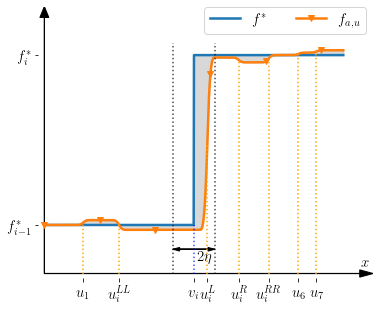

In [13]:
a = [0.2, 0.02, -0.04, 0.71, -0.02, 0.03, 0.01, 0.01, -0.02]
u = [0.13, 0.25, 0.545, 0.65, 0.75, 0.85, 0.91]
eta = 0.05
nn = NeuralNetwork(a, u, eta)

plt.figure(figsize=(6, 5))
plt.box(on=False)
plt.xlim([-0.02, 1.1])
plt.ylim([-0.02, 1.1])
plt.arrow(0, 0, 1.1, 0, head_width=0.03, length_includes_head=True, color='black')
plt.annotate(r'$x$', (1.06, 0.03), size=15)
plt.arrow(0, 0, 0, 1.1, head_width=0.03, length_includes_head=True, color='black')

plt.plot(X, [target(x) for x in X], label=r'$f^*$', linewidth=2.5)
plt.plot(X, [nn(x) for x in X], marker='v', markevery=185, label=r'$f_{a,u}$', linewidth=2.5)
plt.fill_between(X, [target(x) for x in X], [nn(x) for x in X], color='gray', alpha=0.3)
plt.legend(loc='center right', bbox_to_anchor=(1., 0.95), fontsize=15, ncol=2)

plt.vlines([v_1 - 1/n_x], 0, [f_0], color='blue', linestyles='dotted', alpha=0.7)
plt.vlines([v_1 - 0.07], 0, 0.95, color='black', linestyles='dotted', alpha=0.7)
plt.vlines([v_1 + 0.07], 0, 0.95, color='black', linestyles='dotted', alpha=0.7)
plt.vlines(u, 0, [nn(x) for x in u], color='orange', linestyles='dotted')
plt.xticks([v_1 - 1/n_x] + u, [r'$v_i$', r'$u_1$', r'$u_i^{LL}$', r'$u_i^L$', r'$u_i^R$', r'$u_i^{RR}$', r'$u_6$', r'$u_7$'], size=15)
#plt.hlines([f_0, f_1, f_2], 0, [0, v_1, v_2], color='blue', linestyles='dashed', alpha=0.5)
plt.yticks([f_0, f_1], [r'$f_{i-1}^*$', r'$f_i^*$'], size=15)

plt.arrow(v_1 - 0.07, 0.1, 0.14, 0, head_width=0.015, length_includes_head=True, color='black')
plt.arrow(v_1 + 0.07, 0.1, -0.14, 0, head_width=0.015, length_includes_head=True, color='black')
plt.annotate(r'$2 \eta$', (v_1+0.01, 0.055), size=15)


plt.savefig('figures/manual_plots/sketch-proof-2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()